In [46]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
%matplotlib inline

In [49]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')

In [50]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [51]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
34054,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34055,1,0,0,0,0,0,0,0,0,5,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34056,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34057,3,0,0,0,0,0,0,0,0,0,...,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34058,9,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
fashion_train_df.shape

(34059, 785)

In [54]:
fashion_test_df.shape

(10000, 785)

In [55]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [56]:
training.shape

(34059, 785)

In [57]:
import random

0.0

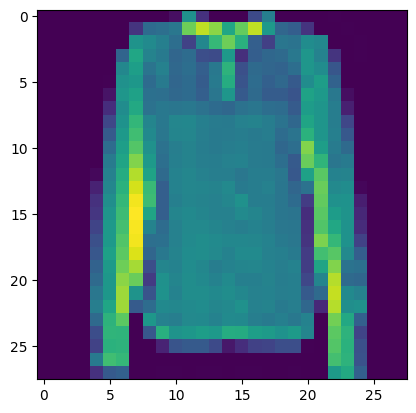

In [58]:
i = random.randint(0,200) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

**i** = random.randint(0,60001)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,1] 
label

In [59]:
i = random.randint(0,10001)
training[i,1:].reshape(28,28)


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   7.,
         42.,  53.,  48.,  66.,  57.,  44.,  28.,   5.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  25.,  56.,  69.,  78.,
         63.,  99.,  45.,   7.,  28.,  65.,  57.,  71.,  72.,  50.,  13.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  50., 121.,  90.,  90.,  97.,
         81.,  85., 111., 103.,  99.,  83.,  65.,  78.,  77.,  94.,  93.,
          5.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   5., 118., 131., 100.,  91.,  97.,
         99.,  99.,  87.,  94.,  90.,  74.,  78.,  80.,  77.,  85., 108.,
         45.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  41., 173., 133., 179.,  84.,  97.,
         97.,  93.,  91.,  97.,  96.,  81.,  80.,  85.,  78.,  93., 105.,
         94.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

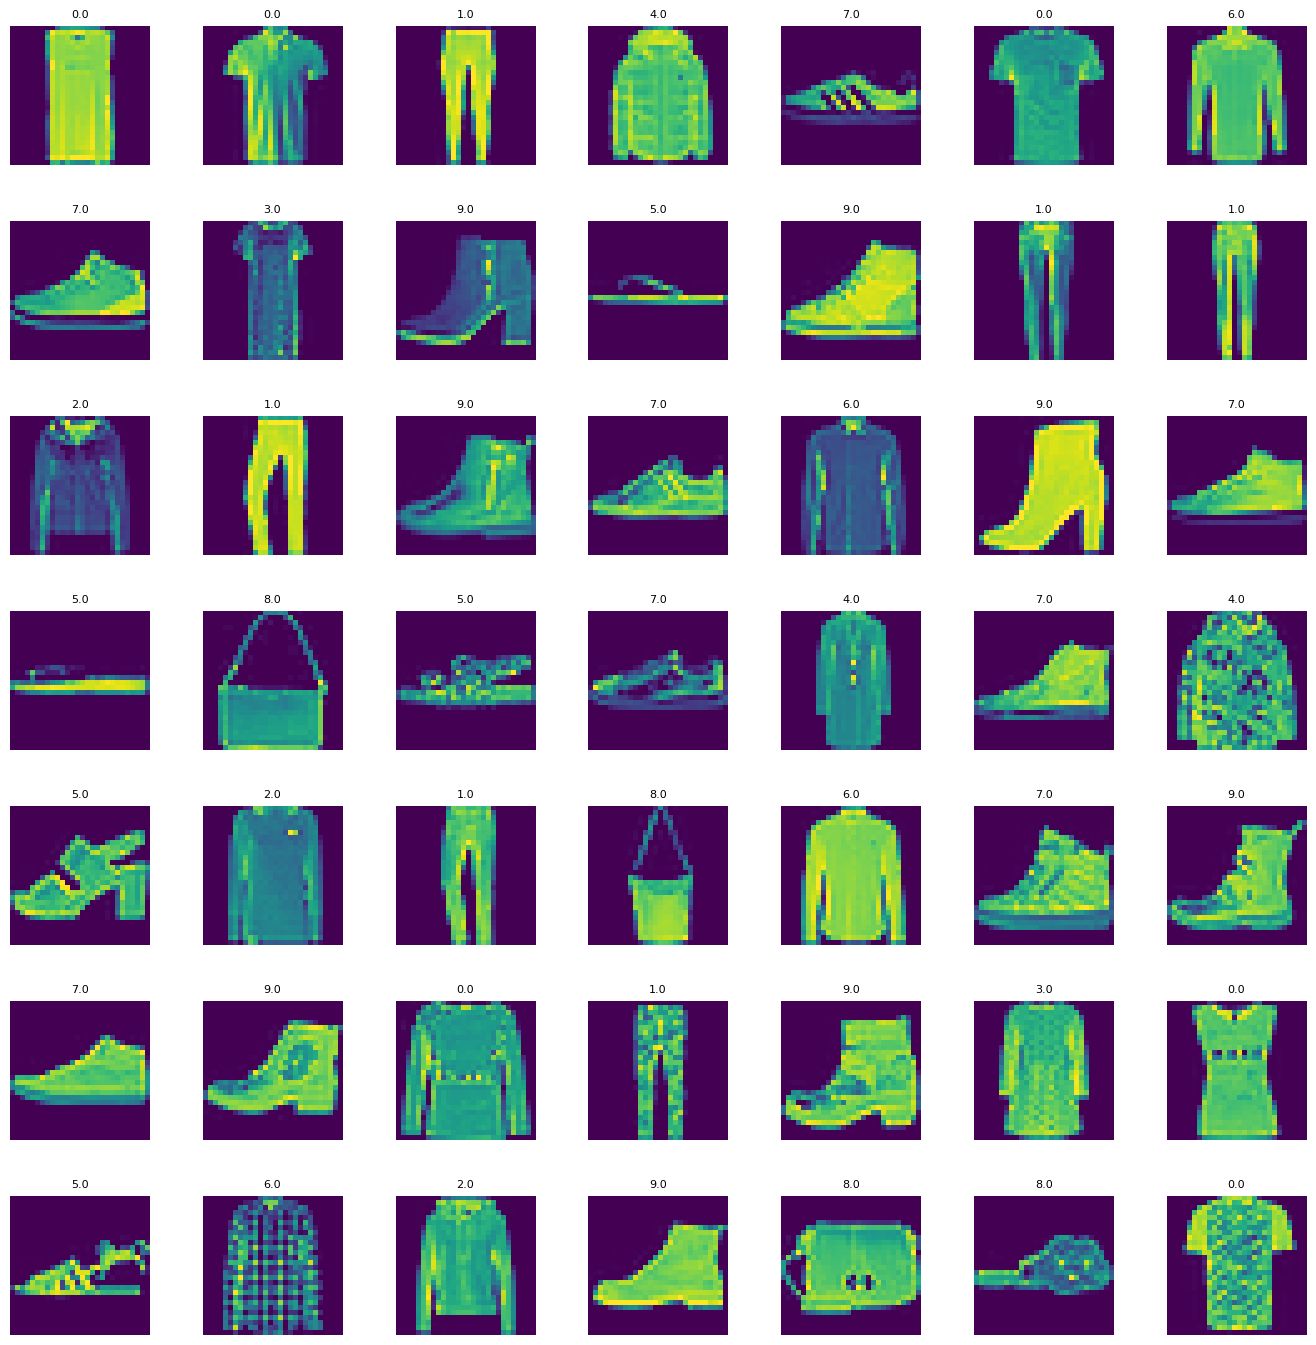

In [60]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [61]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [63]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [64]:
X_train.shape


(27247, 28, 28, 1)

In [65]:
X_test.shape

(10000, 28, 28, 1)

In [66]:
X_validate.shape

(6812, 28, 28, 1)

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [68]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))


cnn_model.add(Flatten())

cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(25,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])


In [69]:
epochs = 200


In [70]:

cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
54/54 [==============================] - 3s 34ms/step - loss: nan - accuracy: 0.1025 - val_loss: nan - val_accuracy: 0.0926
Epoch 2/200
54/54 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.1024 - val_loss: nan - val_accuracy: 0.0926
Epoch 3/200
54/54 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.1024 - val_loss: nan - val_accuracy: 0.0926
Epoch 4/200
54/54 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.1024 - val_loss: nan - val_accuracy: 0.0926
Epoch 5/200
54/54 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.1024 - val_loss: nan - val_accuracy: 0.0926
Epoch 6/200
54/54 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.1024 - val_loss: nan - val_accuracy: 0.0926
Epoch 7/200
54/54 [==============================] - 2s 46ms/step - loss: nan - accuracy: 0.1024 - val_loss: nan - val_accuracy: 0.0926
Epoch 8/200
54/54 [=============================

In [71]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1000
Test Accuracy : 0.100


In [72]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)


313/313 [==============================] - 1s 2ms/step


In [73]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

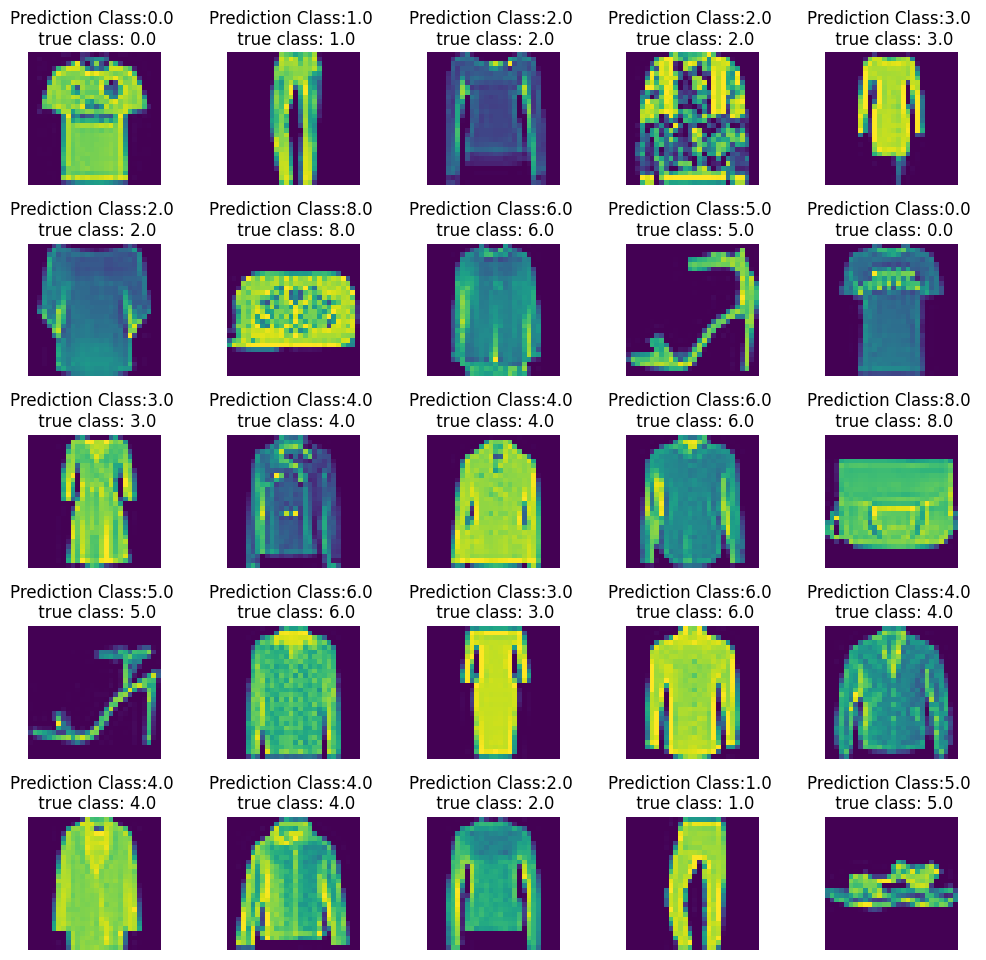

In [74]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [75]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.18      1000
     Class 1       0.00      0.00      0.00      1000
     Class 2       0.00      0.00      0.00      1000
     Class 3       0.00      0.00      0.00      1000
     Class 4       0.00      0.00      0.00      1000
     Class 5       0.00      0.00      0.00      1000
     Class 6       0.00      0.00      0.00      1000
     Class 7       0.00      0.00      0.00      1000
     Class 8       0.00      0.00      0.00      1000
     Class 9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [78]:
#Make predictions


y_probs = cnn_model.predict(X_train)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

852/852 [==============================] - 3s 3ms/step


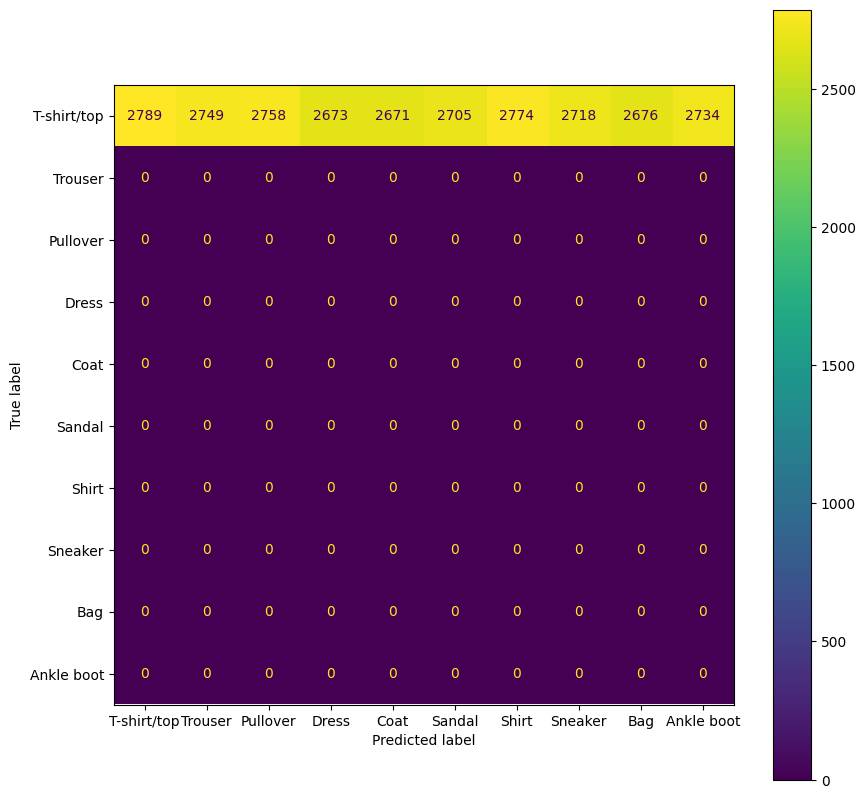

In [79]:
#Confusion matrix
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
cm=confusion_matrix(y_preds,y_train)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);